In [1]:
#|default_exp conn_mat_center

# save data

In [1]:
from gradecc.utils.filenames import dir_conn_mat
import pickle

def dump_pkl(obj, fname):
    with open(dir_conn_mat+fname +'.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_pkl(fname):
    with open(dir_conn_mat+fname +'.pickle', 'rb') as handle:
        return pickle.load(handle)

In [2]:

# dump_pkl(conn_mat, 'conn_mat')
# dump_pkl(conn_mat_centered, 'conn_mat_centered')
# dump_pkl(subject_riemann_mean, 'subject_riemann_mean')
# dump_pkl(grand_mean, 'grand_mean')

conn_mat = load_pkl('conn_mat')
conn_mat_centered = load_pkl('conn_mat_centered')
subject_riemann_mean = load_pkl('subject_riemann_mean')
grand_mean = load_pkl('grand_mean')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/qasem/PycharmProjects/gradients-rl-task/data/cache/conn_mat/conn_mat.pickle'

In [2]:
# grand_mean

In [ ]:
# postscript 2 stands for not including `rest` epoch in analysis

# dump_pkl(conn_mat2, 'conn_mat2')
# dump_pkl(conn_mat_centered2, 'conn_mat_centered2')
# dump_pkl(subject_riemann_mean2, 'subject_riemann_mean2')
# dump_pkl(grand_mean2, 'grand_mean2')

# conn_mat2 = load_pkl('conn_mat2')
# conn_mat_centered2 = load_pkl('conn_mat_centered2')
# subject_riemann_mean2 = load_pkl('subject_riemann_mean2')
# grand_mean2 = load_pkl('grand_mean2')

# import and load data

In [4]:
#|export
import pandas as pd
import numpy as np
from tqdm import tqdm

from gradecc.compute.conn_mat import ConnectivityMatrixMean
from gradecc.load_data.subject import SUBJECTS_INT
from gradecc.load_data import Timeseries

from pyriemann.utils.mean import mean_riemann

In [ ]:
import umap

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='white', context='notebook', rc={'figure.figsize': (7, 5)})

In [ ]:
#|export
E = ['rest', 'baseline', 'early', 'late']
E2 = ['baseline', 'early', 'late']

In [ ]:
#|export
se = [[s, e] for s in SUBJECTS_INT for e in E]
se = pd.DataFrame(se, columns=['subject_int', 'epoch'])

In [ ]:
se

In [ ]:
#|export
se2 = [[s, e] for s in SUBJECTS_INT for e in E2]
se2 = pd.DataFrame(se2, columns=['subject_int', 'epoch'])


# connectivity matrices

In [5]:
#|export
def make_conn_mats(epochs):
    conn_mat = {s: {} for s in SUBJECTS_INT}
    for s in tqdm(SUBJECTS_INT):
        for e in epochs:
            c = ConnectivityMatrixMean(epoch=e, subjects=s, kind='covariance', )
            c.load()
            conn_mat[s][e] = c.data
    return conn_mat

In [6]:
#|export
# conn_mat = make_conn_mats(['baseline', 'early', 'late'])
# conn_mat2 = make_conn_mats(E2)

100%|██████████| 38/38 [00:32<00:00,  1.18it/s]


In [ ]:
# for subject s, epoch e
# conn_mat[s][e]

In [ ]:
#|export
def flat(d: dict):
    d_flat = {s: {} for s in SUBJECTS_INT}
    for s in tqdm(SUBJECTS_INT):
        for e in d[s].keys():
            d_flat[s][e] = d[s][e].flatten()
    return d_flat

# conn_mat_flat = flat(conn_mat)
# conn_mat_flat2 = flat(conn_mat2)

In [ ]:
#|export
def stack(mat):
    return np.vstack([
        np.stack([
            mat[s][e]
            for e in mat[s].keys()
        ])
        for s in SUBJECTS_INT
    ])

# conn_mat_stacked = stack(conn_mat)
# conn_mat_stacked2 = stack(conn_mat2)

In [ ]:
conn_mat_stacked2.shape

In [ ]:
#|export
conn_mat_flat_stacked = stack(conn_mat_flat)
conn_mat_flat_stacked2 = stack(conn_mat_flat2)

In [ ]:
conn_mat_flat_stacked.shape

# umap

In [ ]:
reducer = umap.UMAP(random_state=42)

In [ ]:
embedding = reducer.fit_transform(conn_mat_flat_stacked)
embedding.shape
emb = pd.DataFrame(embedding, columns=['e1', 'e2'])
emb = pd.concat([se, emb], axis=1)

In [ ]:
embedding2 = reducer.fit_transform(conn_mat_flat_stacked2)
emb2 = pd.DataFrame(embedding2, columns=['e1', 'e2'])
emb2 = pd.concat([se2, emb2], axis=1)

# plot 2d

In [ ]:
sns.scatterplot(data=emb.astype({'subject_int': str}),
                x='e1', y='e2',
                hue='subject_int', style='epoch',
                legend=False)

# pyriemann centering

In [ ]:
#|export
all_cmats = conn_mat_stacked
all_cmats2 = conn_mat_stacked2

In [ ]:
print(all_cmats.shape)

In [ ]:
ts = Timeseries(epoch=E[0], subject_id=SUBJECTS_INT[0])
ts.load()
region_names = ts.region_names
roi_labels = region_names

- should not fill diag with 0 to compute mean riemann

In [ ]:
#|export
# grand_mean = mean_riemann(all_cmats, maxiter=5)
# grand_mean2 = mean_riemann(all_cmats2, maxiter=5)

In [ ]:
# grand_mean based on epoch...

In [ ]:
#|export
# grand_mean = mean_riemann(all_cmats, maxiter=5)
# grand_mean2 = mean_riemann(all_cmats2, maxiter=5)

In [ ]:
# grand_mean based on epoch...

In [29]:
#|export
# save grand_mean
# df = pd.DataFrame(grand_mean, index=roi_labels, columns=roi_labels)
# df.to_csv('grand_mean.tsv', sep='\t')

# save grand_mean
# df = pd.DataFrame(grand_mean2, index=roi_labels, columns=roi_labels)
# df.to_csv('grand_mean2.tsv', sep='\t')

In [31]:
#|export
def make_subj_r_mean(conn_mat):
    subject_riemann_mean = {}
    for s in tqdm(SUBJECTS_INT):
        subject_riemann_mean[s] = mean_riemann(np.stack(conn_mat[s].values()), maxiter=10)
    return subject_riemann_mean

# subject_riemann_mean2 = make_subj_r_mean(conn_mat2)

In [36]:
#|export
# https://github.com/danjgale/adaptation-manifolds/blob/main/adaptman/connectivity.py

from pyriemann.utils.base import sqrtm, logm, expm, invsqrtm

def center_cmat(c, sub_mean, grand_mean):
    """Center covariance matrix using tangent transporting procedure

    Parameters
    ----------
    c : numpy.ndarray
        Single MxM covariance matrix of a single subject
    sub_mean : numpy.ndarray
        Geometric mean covariance matrix of the subject
    grand_mean : numpy.ndarray
        Geometric mean across all subjects and matrices

    Returns
    -------
    numpy.ndarray
        Centered covariance matrix
    """
    t = _to_tangent(c, sub_mean)
    tc = _gl_transport(t, sub_mean, grand_mean)
    return _from_tangent(tc, grand_mean)


# Covariance centering
def _to_tangent(s, mean):
    p = sqrtm(mean)
    p_inv = invsqrtm(mean)
    return p @ logm(p_inv @ s @ p_inv) @ p


def _gl_transport(t, sub_mean, grand_mean):
    g = sqrtm(grand_mean) @ invsqrtm(sub_mean)
    return g @ t @ g.T


def _from_tangent(t, grand_mean):
    p = sqrtm(grand_mean)
    p_inv = invsqrtm(grand_mean)
    return p @ expm(p_inv @ t @ p_inv) @ p


In [21]:
#|export
def make_conn_mat_cen(conn_mat):
    conn_mat_centered = {}
    for s in tqdm(SUBJECTS_INT):
        conn_mat_centered[s] = {
            e: center_cmat(conn_mat[s][e], subject_riemann_mean[s], grand_mean)
            for e in conn_mat[s].keys()
        }
    return conn_mat_centered

# conn_mat_centered2 = make_conn_mat_cen(conn_mat2)

In [38]:
# print(conn_mat_centered[1]['early'].shape)
# print(conn_mat[1]['early'].shape)

In [40]:
#|export
conn_mat_centered_flat = flat(conn_mat_centered)
conn_mat_centered_flat2 = flat(conn_mat_centered2)

100%|██████████| 38/38 [00:00<00:00, 61.95it/s]


In [41]:
# umap centered
reducer = umap.UMAP(random_state=42)
embedding_cen = reducer.fit_transform(stack(conn_mat_centered_flat))
print(embedding_cen.shape)
emb_cen = pd.DataFrame(embedding_cen, columns=['e1', 'e2'])
emb_cen = pd.concat([se, emb_cen], axis=1)

(152, 2)


In [42]:
reducer = umap.UMAP(random_state=42)
embedding_cen2 = reducer.fit_transform(stack(conn_mat_centered_flat2))
print(embedding_cen2.shape)
emb_cen2 = pd.DataFrame(embedding_cen2, columns=['e1', 'e2'])
emb_cen2 = pd.concat([se2, emb_cen2], axis=1)

(114, 2)


In [45]:
# embedding_cen2.shape
# emb_cen2

# chart plots

Text(0.5, 1.0, 'centered - NO rest included')

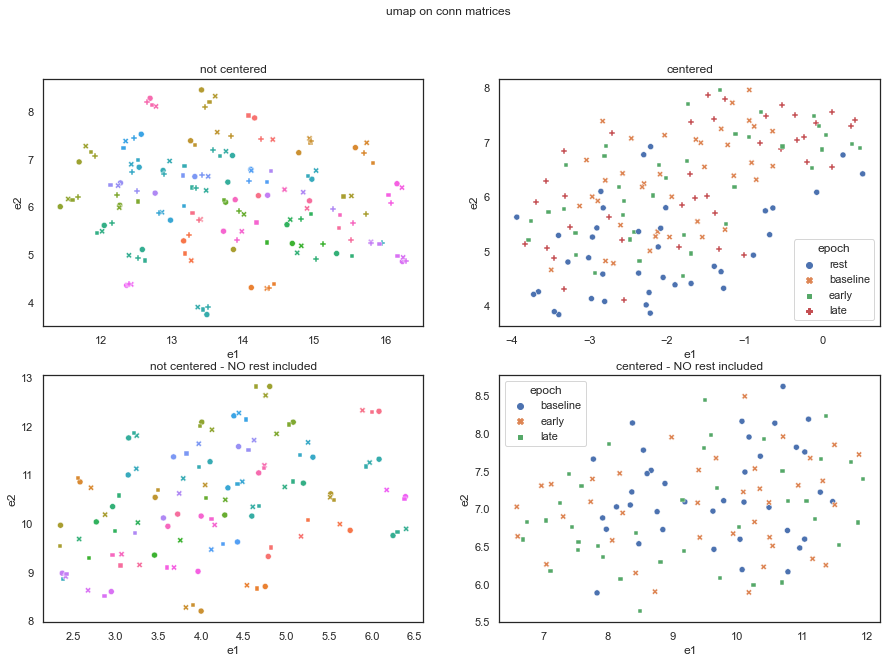

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('umap on conn matrices')

sns.scatterplot(data=emb.astype({'subject_int': str}),
                x='e1', y='e2',
                hue='subject_int',
                style='epoch',
                legend=False,
                ax=axes[0, 0],
                )
axes[0, 0].set_title('not centered')

sns.scatterplot(data=emb_cen.astype({'subject_int': str}),
                x='e1', y='e2',
                style='epoch',
                hue='epoch',
                # legend=False,
                ax=axes[0, 1],
                )
axes[0, 1].set_title('centered')


sns.scatterplot(data=emb2.astype({'subject_int': str}),
                x='e1', y='e2',
                hue='subject_int',
                style='epoch',
                legend=False,
                ax=axes[1, 0],
                )
axes[1, 0].set_title('not centered - NO rest included')

sns.scatterplot(data=emb_cen2.astype({'subject_int': str}),
                x='e1', y='e2',
                style='epoch',
                hue='epoch',
                # legend=False,
                ax=axes[1, 1],
                )
axes[1, 1].set_title('centered - NO rest included')

In [23]:
from nbdev.export import nb_export

# nb_export('umap.ipynb')

In [10]:
from gradecc.utils.filenames import dir_conn_mat
import pickle

def dump_pkl(obj, fname):
    with open(dir_conn_mat+fname +'.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_pkl(fname):
    with open(dir_conn_mat+fname +'.pickle', 'rb') as handle:
        return pickle.load(handle)

# dump_pkl(conn_mat_centered, 'conn_mat_centered')
# dump_pkl(subject_riemann_mean, 'subject_riemann_mean')
# dump_pkl(grand_mean, 'grand_mean')

# conn_mat_centered = load_pkl('conn_mat_centered')
# subject_riemann_mean = load_pkl('subject_riemann_mean')
# grand_mean = load_pkl('grand_mean')

In [3]:
#|export
def make_conn_mats(epochs):
    conn_mat = {s: {} for s in SUBJECTS_INT}
    for s in tqdm(SUBJECTS_INT):
        for e in epochs:
            c = ConnectivityMatrixMean(epoch=e, subjects=s, kind='covariance', )
            c.load()
            conn_mat[s][e] = c.data
    return conn_mat

In [4]:
#|export
conn_mat = make_conn_mats(['baseline', 'early', 'late'])
# conn_mat2 = make_conn_mats(E2)

NameError: name 'SUBJECTS_INT' is not defined

In [11]:
from gradecc.compute.conn_mat.make_centered import MAX_ITER
from gradecc.load_data import EPOCHS
import numpy as np
from pyriemann.utils.mean import mean_riemann
from tqdm import tqdm

IndentationError: expected an indented block (make_centered.py, line 159)

In [ ]:
grand_mean_epochs = {}
for e_ in tqdm(EPOCHS):
    d = np.stack([
        conn_mat[s][e_] for s in conn_mat.keys()
    ])
    d = mean_riemann(d, maxiter=MAX_ITER)
    grand_mean_epochs[e_] = d

In [20]:
grand_mean_epochs.keys()

dict_keys(['baseline', 'early', 'late'])

In [21]:
cmc = load_pkl('conn_mat_riemannian')

In [22]:
cmc.keys()

dict_keys(['conn_mat_centered', 'include_rest', 'grand_mean', 'subject_riemann_mean'])

In [25]:
cmc['mean_epochs'] = grand_mean_epochs

In [26]:
dump_pkl(cmc, 'conn_mat_riemannian')